<div style="font-family: Arial, sans-serif; font-size: 24px; font-weight: bold;">
    PRIMERA SECCIÓN. RAICES DE ECUACIONES
</div>

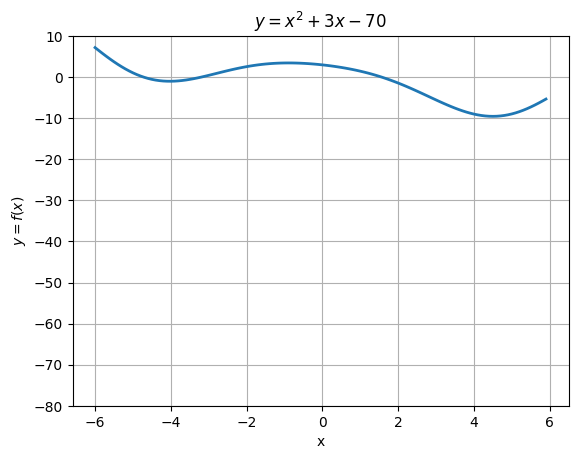

In [ ]:
#GRAFICAR
import math 
from math import *
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(-6.0, 6.0,0.1)

s = x*np.sin(x) + 3*np.cos(x) - x

line, = plt.plot(x, s, lw=2)

plt.grid(True)
plt.ylim(-80, 10)

plt.title("$y=x^2+3x-70$")
plt.ylabel('$y = f(x)$')
plt.xlabel('x')
plt.show()

#METODO DE BISECCION
def y(x):                    # define la funcion y(x)
  y = x*sin(x)+3*cos(x)-x
  return y

x1 = float(input('Captura el valor de x1: ')) # peticion de valor x1
x2 = float(input('Captura el valor de x2: ')) # peticion de valor x2
y1 = y(x1)                                    # evalua la funcion y(x1)
y2 = y(x2)                                    # evalua la funcion y(x1)

if y1*y2 > 0:                                 # prueba si los signos son iguales
  print('No hay raices en el intervalo')
  exit

for i in range(100):
  xh = (x1+x2)/2
  yh = y(xh)                                  # evalua la funcion y(xh)
  y1 = y(x1)                                  # evalua la funcion y(x1)
  if abs(y1) < 1.0e-6:
    break
  elif y1*yh < 0:
    x2 = xh
  else:
    x1 = xh
      
print('La raiz es: %.5f' % x1)
print('Numero de bisecciones: %d' % (i+1))


In [1]:
## Modulo Newton-Raphson
import sys

def err(string):
  print(string)
  input('Press return to exit')
  sys.exit()

def newtonRaphson(f,df,a,b,tol=1.0e-9):
  from numpy import sign
  fa = f(a)
  if fa == 0.0: return a
  fb = f(b)
  if fb == 0.0: return b
  if sign(fa) == sign(fb): err('La raiz no esta en el intervalo')
  x = 0.5*(a + b)
  for i in range(30):
    fx = f(x)
    if fx == 0.0: return x 
    if sign(fa) != sign(fx): b = x # Haz el intervalo mas pequeño
    else: a = x
    dfx = df(x)  
    try: dx = -fx/dfx # Trata un paso con la expresion de Delta x
    except ZeroDivisionError: dx = b - a # Si division diverge, intervalo afuera
    x = x + dx # avanza en x
    if (b - x)*(x - a) < 0.0: # Si el resultado esta fuera, usa biseccion
      dx = 0.5*(b - a)
      x = a + dx 
    if abs(dx) < tol*max(abs(b),1.0): return x # Checa la convergencia y sal
  print('Too many iterations in Newton-Raphson')


EJERCICIOS

Problema 1: Área de un jardín

Imagina que quieres diseñar un jardin rectangular. La longitud del jardín es 3 metros más que el ancho. Deseas que el área total del jardín sea de 70 metros cuadrados. Diseñe una ecuación adecuada para el problema y resulva utilizando métodos computacionales

Problema 2: Precio de una camiseta

Supón que estás en una tienda y ves una camiseta que te gusta. El precio original es de $40, pero están en oferta y se aplica un descuento del 25%. Además, hay un impuesto del 10% sobre el precio ya descontado ya descontado. ¿Cuál es el precio final de la camiseta?

Problema 3

Encontrar la raíz de la función F(x)=cosx - x
en el intervalo [0,1]

LIBRO

<div style="font-family: Arial, sans-serif; font-size: 24px; font-weight: bold;">
    SEGUNDA SECCIÓN. DIFERENCIACION NUMERICA
</div>

Se utilizan las tablas de forward, backward y central, necesitamos un polinomio, se obtiene con el polinomio de lagrange.
Tambien podrian dar la funcion directamete.

Recuerda que para el polinomio de Lagrange: funcion_numerica = sp.lambdify(x, polinomio_simplificado)

from sympy import symbols,lambdify



In [ ]:
#estructura
def f(x,n): #La función a derivar con n decimales
  return round(e**(-x),n)

def d2fc(x,h,f,n): #Segunda derivada de f con aproximación central con n decimales
  d2fc=(f(x+h,n)+f(x-h,n)-2*f(x,n))/(h**2)
  return d2fc


EJERCICIOS

<div style="font-family: Arial, sans-serif; font-size: 24px; font-weight: bold;">
    TERCERA SECCIÓN. INTEGRACION NUMERICA
</div>

misma idea de derivada, se usa la regla trapezoidal

In [3]:
import math
def trapecio_recursiva(f,a,b,Iold,k):
  if k == 1: Inew = (f(a) + f(b))*(b - a)/2.0
  else:
    n = 2**(k -2 ) # numero de nuevos puntos
    h = (b - a)/n # espaciamiento de nuevos puntos
    x = a + h/2.0
    sum = 0.0
    for i in range(n):
      sum = sum + f(x)
      x = x + h
      Inew = (Iold + h*sum)/2.0
  return Inew


#llamar la funcion 
def f(x): return math.sqrt(x)*math.cos(x) #funcion
Iold = 0.0
for k in range(1,21):
  Inew = trapecio_recursiva(f,0.0,math.pi,Iold,k)
  if (k > 1) and (abs(Inew - Iold)) < 1.0e-6: break
  Iold = Inew

print('Integral =',Inew)
print('n Panels =',2**(k-1))

#necesita solo dos paneles 

Integral = -0.8948316648532865
n Panels = 32768


In [ ]:
EJERCICIOS